# Analyze the characteristics of street children using hierarchical clusters

Penelitian pemetaan karaktristik anak jalanan guna 
pengembangan model pembinaan yang lebih efektif (tepat guna)
Survei dilakukan terhadap 97 anak jalanan
Variabel yang diukur: 

1) Penggunaan Uang (skor 1=Sangat Tidak Butuh untuk Hidup; 
2=Tidak Butuh; 3=butuh; 4=Sangat Butuh)
2) Kondisi Pendidikan Anak (1=Tidak Sekolah; 2=Jarang sekolah; 
3=Aktif)
3) Pendidikan Bapak (1=Tidak Sekolah; 2=SD; 3=SLTP; 4=SLTA; 
5=Perguruan Tinggi)
4) Pendidikan Ibu (1=Tidak Sekolah; 2=SD; 3=SLTP; 4=SLTA; 
5=Perguruan Tinggi)
5) Harapan terhadap Pemerintah (1= Sangat Tidak berharap 
dientaskan; 2=Tidak berharap; 3=Acuh; 4=Berharap; 5=Sangat 
berharap)

# Load Data Set 

In [2]:
# !pip install pyarrow

   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
    --------------------------------------- 0.5/25.2 MB 2.4 MB/s eta 0:00:11
   - -------------------------------------- 1.0/25.2 MB 2.4 MB/s eta 0:00:11
   -- ------------------------------------- 1.3/25.2 MB 2.1 MB/s eta 0:00:12
   -- ------------------------------------- 1.8/25.2 MB 2.0 MB/s eta 0:00:12
   --- ------------------------------------ 2.4/25.2 MB 2.1 MB/s eta 0:00:12
   ---- ----------------------------------- 2.9/25.2 MB 2.1 MB/s eta 0:00:11
   ----- ---------------------------------- 3.4/25.2 MB 2.2 MB/s eta 0:00:10
   ------ --------------------------------- 3.9/25.2 MB 2.2 MB/s eta 0:00:10
   ------- -------------------------------- 4.5/25.2 MB 2.2 MB/s eta 0:00:10
   ------- -------------------------------- 5.0/25.2 MB 2.3 MB/s eta 0:00:09
   -------- ------------------------------- 5.5/25.2 MB 2.3 MB/s eta 0:00:09
   --------- ------------------------------ 5.8/25.2 MB 2.3 MB/s eta 0:00:09
   ---

In [8]:
# pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd

path = "D:\\1.Data Science\\project\\analisis-cluster-hierarki\\data_anak_jalanan.xlsx"
df = pd.read_excel(path)
df


,No.,Penggunaan Uang untuk Pendidikan,Tingkat Pendidikan Responden,Jumlah Anak,Tingkat Pendidikan Ayah,Tingkat Pendidikan Ibu,Harapan terhadap Pemerintah
0,1,2,1,4,4,1,1
1,2,1,1,3,3,1,1
2,3,1,1,4,3,3,1
3,4,1,1,3,4,3,1
4,5,3,1,3,3,1,1
5,6,3,1,3,3,1,1
6,7,4,3,2,2,4,1
7,8,1,2,4,3,2,1
8,9,1,1,3,4,2,1
9,10,1,1,4,3,4,1


# Data Processing

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   No.                               25 non-null     int64
 1   Penggunaan Uang untuk Pendidikan  25 non-null     int64
 2   Tingkat Pendidikan Responden      25 non-null     int64
 3   Jumlah Anak                       25 non-null     int64
 4   Tingkat Pendidikan Ayah           25 non-null     int64
 5   Tingkat Pendidikan Ibu            25 non-null     int64
 6   Harapan terhadap Pemerintah       25 non-null     int64
dtypes: int64(7)
memory usage: 1.5 KB


In [22]:
df.shape

(25, 7)

In [23]:
df.isnull().sum()

No.                                 0
Penggunaan Uang untuk Pendidikan    0
Tingkat Pendidikan Responden        0
Jumlah Anak                         0
Tingkat Pendidikan Ayah             0
Tingkat Pendidikan Ibu              0
Harapan terhadap Pemerintah         0
dtype: int64

Cek Outlier

In [24]:
# Mendefinisikan fungsi untuk mendeteksi outliers dengan IQR
def detect_outliers_iqr(df):
    outliers = []
    for col in df.select_dtypes(include=[float, int]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers.extend(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist())
    
    outliers = list(set(outliers))
    return outliers

# Mendeteksi outliers
outliers_iqr = detect_outliers_iqr(df)

# Menampilkan jumlah outliers yang terdeteksi dan beberapa contoh
print(f"Jumlah outliers yang terdeteksi dengan IQR: {len(outliers_iqr)}")
print(f"Contoh beberapa outliers (baris): {outliers_iqr[:10]}")


Jumlah outliers yang terdeteksi dengan IQR: 0
Contoh beberapa outliers (baris): []


 Menghapus kolom 'No.' karena tidak relevan untuk clustering


In [25]:
df = df.drop(columns=['No.'])

In [26]:
df

,Penggunaan Uang untuk Pendidikan,Tingkat Pendidikan Responden,Jumlah Anak,Tingkat Pendidikan Ayah,Tingkat Pendidikan Ibu,Harapan terhadap Pemerintah
0,2,1,4,4,1,1
1,1,1,3,3,1,1
2,1,1,4,3,3,1
3,1,1,3,4,3,1
4,3,1,3,3,1,1
5,3,1,3,3,1,1
6,4,3,2,2,4,1
7,1,2,4,3,2,1
8,1,1,3,4,2,1
9,1,1,4,3,4,1


Menstandarisasikan Data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [28]:
from scipy.spatial.distance import pdist, squareform
import pandas as pd


# Calculate the Distance Matrix
distance_matrix = pdist(df_scaled, metric= 'euclidean')

# Convert to square matrix for easy interpretation
distance_matrix_square = squareform(distance_matrix)

# Optional: Convert to DataFrame for easier visualization
df_distance_matrix = pd.DataFrame(distance_matrix_square)


print(df_distance_matrix.head())


         0         1         2         3         4         5         6   \
0  0.000000  1.903018  2.174837  2.137091  1.903018  1.903018  5.131020   
1  1.903018  0.000000  1.965131  2.006115  1.679783  1.679783  4.594156   
2  2.174837  1.965131  0.000000  1.707648  2.585230  2.585230  4.501783   
3  2.137091  2.006115  1.707648  0.000000  2.616518  2.616518  4.555691   
4  1.903018  1.679783  2.585230  2.616518  0.000000  0.000000  3.932293   

         7         8         9   ...        15        16        17        18  \
0  2.104424  1.644184  2.799335  ...  3.517053  3.854186  4.051821  2.870489   
1  1.886909  1.469926  2.639717  ...  2.395356  2.324038  3.128150  1.240729   
2  1.477759  1.880780  0.788208  ...  3.514652  2.654433  3.380856  2.324038   
3  2.258281  0.788208  1.880780  ...  3.583441  2.744866  3.452312  2.939851   
4  2.526281  2.232118  3.128861  ...  1.707648  2.867546  2.638873  2.088320   

         19        20        21        22        23        24  
0  3

Melakukan Penggabungan (Linkage)

In [29]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Choose Linkage Method (e.g. Ward's Method)
# Using 'ward', can also be 'single', 'complete', or 'average'  as needed
method = 'ward' 

# Create Linkage Matrix
# Linkage matrix is needed to create a dendrogram
linkage_matrix = linkage(df_scaled, method=method)


 Membuat dan menampilkan dendrogram

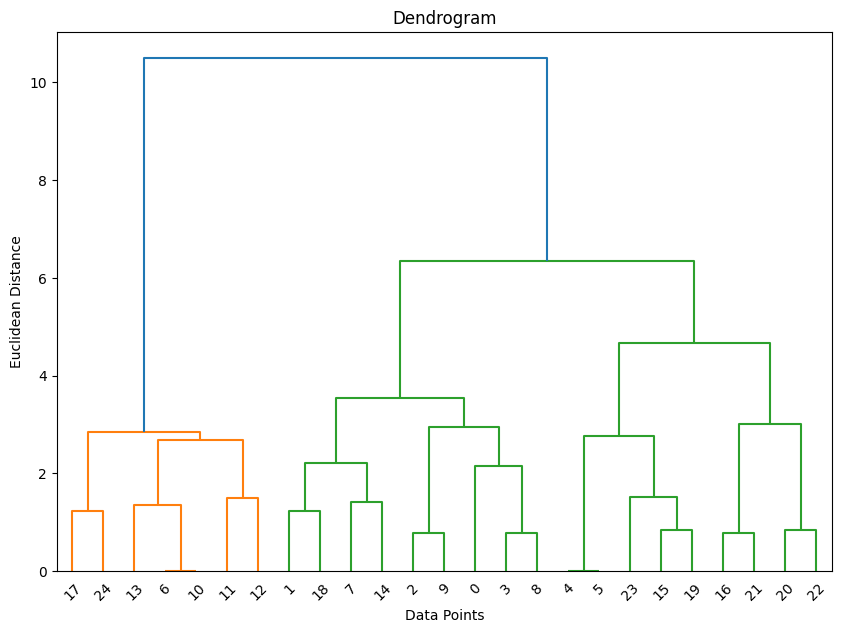

In [30]:

#  Plot Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


In [31]:
from scipy.cluster.hierarchy import fcluster
max_d = 7
clusters = fcluster(linkage_matrix, max_d, criterion='distance')

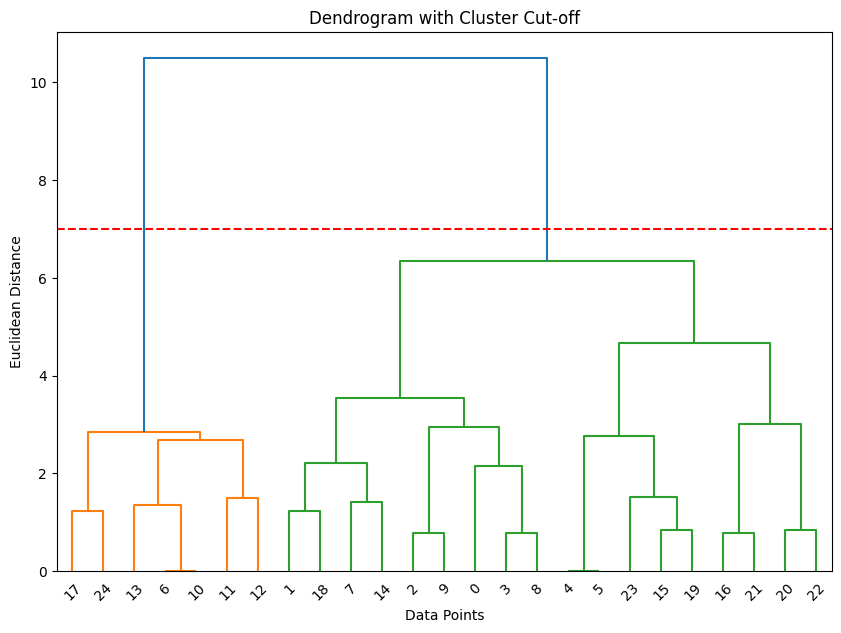

In [40]:

# (Opsional) Visualisasikan Dendrogram dengan Garis Pemotong
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.axhline(y=max_d, color='r', linestyle='--')
plt.title('Dendrogram with Cluster Cut-off')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [41]:
# 6. Menambahkan hasil cluster ke dataframe asli
df['Cluster'] = clusters

In [42]:
df

,Penggunaan Uang untuk Pendidikan,Tingkat Pendidikan Responden,Jumlah Anak,Tingkat Pendidikan Ayah,Tingkat Pendidikan Ibu,Harapan terhadap Pemerintah,Cluster
0,2,1,4,4,1,1,2
1,1,1,3,3,1,1,2
2,1,1,4,3,3,1,2
3,1,1,3,4,3,1,2
4,3,1,3,3,1,1,2
5,3,1,3,3,1,1,2
6,4,3,2,2,4,1,1
7,1,2,4,3,2,1,2
8,1,1,3,4,2,1,2
9,1,1,4,3,4,1,2


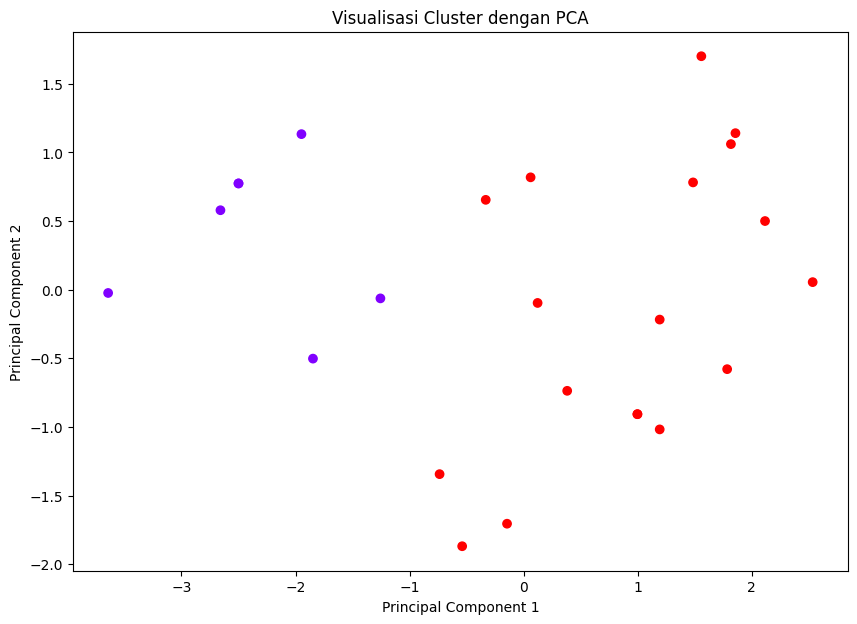

In [43]:
from sklearn.decomposition import PCA

# Lakukan PCA untuk mereduksi data menjadi 2 dimensi
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Buat DataFrame dari hasil PCA
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Visualisasi Scatter Plot dari hasil PCA
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='rainbow')
plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Interpretasi Hasil

In [44]:
# 1. Analisis Cluster
# Tinjau karakteristik tiap cluster
cluster_summary = df.groupby('Cluster').mean()
print("Rata-rata setiap fitur dalam masing-masing cluster:")
print(cluster_summary)

Rata-rata setiap fitur dalam masing-masing cluster:
         Penggunaan Uang untuk Pendidikan  Tingkat Pendidikan Responden  \
Cluster                                                                   
1                                3.571429                      2.714286   
2                                1.833333                      1.166667   

         Jumlah Anak  Tingkat Pendidikan Ayah  Tingkat Pendidikan Ibu  \
Cluster                                                                 
1           1.857143                 1.714286                3.714286   
2           2.833333                 2.833333                2.000000   

         Harapan terhadap Pemerintah  
Cluster                               
1                                1.0  
2                                1.0  


In [45]:
# Anda juga bisa melihat distribusi atau median jika diperlukan
cluster_median = df.groupby('Cluster').median()
print("\nMedian setiap fitur dalam masing-masing cluster:")
print(cluster_median)



Median setiap fitur dalam masing-masing cluster:
         Penggunaan Uang untuk Pendidikan  Tingkat Pendidikan Responden  \
Cluster                                                                   
1                                     4.0                           3.0   
2                                     1.0                           1.0   

         Jumlah Anak  Tingkat Pendidikan Ayah  Tingkat Pendidikan Ibu  \
Cluster                                                                 
1                2.0                      2.0                     4.0   
2                3.0                      3.0                     1.5   

         Harapan terhadap Pemerintah  
Cluster                               
1                                1.0  
2                                1.0  


In [46]:
from scipy.cluster.hierarchy import cophenet

# 2. Evaluasi Hasil Clustering
# Hitung Cophenetic Correlation Coefficient
c, _ = cophenet(linkage_matrix, distance_matrix)

print(f"\nCophenetic Correlation Coefficient: {c:.4f}")

# Interpretasi Cophenetic Correlation Coefficient
if c > 0.75:
    print("Hasil clustering memiliki hubungan yang baik dengan matriks jarak asli.")
elif c > 0.5:
    print("Hasil clustering cukup baik, namun bisa diperbaiki.")
else:
    print("Hasil clustering kurang baik, pertimbangkan untuk menggunakan metode lain.")


Cophenetic Correlation Coefficient: 0.7474
Hasil clustering cukup baik, namun bisa diperbaiki.


# Kesimpulan

Berdasarkan hasil analisis clustering hierarki yang telah dilakukan, berikut adalah kesimpulan yang dapat ditarik:

### 1. **Pembagian Cluster:**
   - Data dibagi menjadi dua cluster berdasarkan karakteristik yang telah ditentukan.

### 2. **Karakteristik Masing-Masing Cluster:**
   - **Cluster 1:**
     - **Penggunaan Uang untuk Pendidikan:** Rata-rata penggunaan uang untuk pendidikan di cluster ini lebih tinggi (3.57) dibandingkan dengan cluster 2. Median penggunaan uang juga tinggi, yaitu 4.
     - **Tingkat Pendidikan Responden:** Responden dalam cluster ini memiliki tingkat pendidikan yang lebih tinggi dengan rata-rata 2.71 dan median 3.
     - **Jumlah Anak:** Cluster ini memiliki rata-rata jumlah anak yang lebih rendah (1.86) dibandingkan cluster 2.
     - **Tingkat Pendidikan Ayah dan Ibu:** Tingkat pendidikan ayah di cluster ini lebih rendah (rata-rata 1.71) dibandingkan dengan cluster 2, namun tingkat pendidikan ibu lebih tinggi (rata-rata 3.71).
     - **Harapan terhadap Pemerintah:** Semua responden dalam cluster ini memiliki harapan yang sama terhadap pemerintah (rata-rata 1).

   - **Cluster 2:**
     - **Penggunaan Uang untuk Pendidikan:** Rata-rata penggunaan uang untuk pendidikan lebih rendah (1.83) dengan median 1.
     - **Tingkat Pendidikan Responden:** Responden di cluster ini memiliki tingkat pendidikan yang lebih rendah (rata-rata 1.17, median 1).
     - **Jumlah Anak:** Cluster ini memiliki rata-rata jumlah anak yang lebih tinggi (2.83).
     - **Tingkat Pendidikan Ayah dan Ibu:** Tingkat pendidikan ayah di cluster ini lebih tinggi (rata-rata 2.83), namun tingkat pendidikan ibu lebih rendah (rata-rata 2.00).
     - **Harapan terhadap Pemerintah:** Sama seperti cluster 1, semua responden dalam cluster ini memiliki harapan yang sama terhadap pemerintah (rata-rata 1).

### 3. **Interpretasi Hasil:**
   - **Cluster 1** dapat diinterpretasikan sebagai kelompok dengan pendidikan yang lebih baik, baik dari sisi responden maupun orang tua, serta penggunaan uang yang lebih besar untuk pendidikan.
   - **Cluster 2** tampaknya terdiri dari kelompok dengan pendidikan yang lebih rendah dan penggunaan uang untuk pendidikan yang lebih sedikit, tetapi dengan jumlah anak yang lebih banyak dan tingkat pendidikan ayah yang lebih tinggi.

### 4. **Evaluasi Clustering:**
   - **Cophenetic Correlation Coefficient** sebesar 0.7474 menunjukkan bahwa hasil clustering cukup baik. Namun, ada ruang untuk perbaikan. Koefisien ini mengukur seberapa baik dendrogram yang dihasilkan dari clustering mencerminkan matriks jarak asli. Meskipun hasil ini cukup memadai, pemilihan metode linkage atau pengaturan ulang parameter clustering dapat mempertajam hasil lebih lanjut.

### 5. **Kesimpulan Umum:**
   - Clustering ini berhasil mengidentifikasi dua kelompok utama dalam data, dengan karakteristik yang berbeda dalam hal pendidikan, penggunaan uang untuk pendidikan, dan jumlah anak. Hasil ini dapat digunakan untuk mengembangkan strategi pembinaan yang lebih terfokus sesuai dengan profil setiap cluster. Meskipun hasil clustering ini cukup baik, beberapa penyesuaian dan evaluasi lebih lanjut mungkin diperlukan untuk mencapai hasil yang lebih optimal.